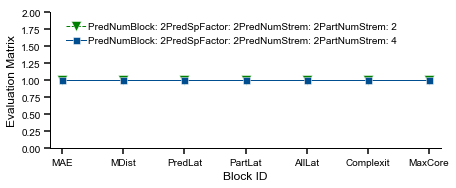

In [9]:
# FPS_Performance_Eval

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('../../Nebula/scripts/')
from cls_plt_fig import cls_plt_fig

np.save("../source/perf.npy", np.ones([2, 2, 2, 2, 7]))

fig_name ='../generate/FPS_Performance_Eval.svg'
perf = np.load("../source/perf.npy")

pick = [[0, 0, 0, 0], [0, 0, 0, 1]]
legend = []
y_value =[]
for i in range(len(pick)):
    y_value.append(perf[pick[i][0]][pick[i][1]][pick[i][2]][pick[i][3]])
    legend_item = 'PredNumBlock: ' + str(2**(pick[i][0] + 1)) + \
                  'PredSpFactor: ' + str(2**(pick[i][1] + 1)) + \
                  'PredNumStrem: ' + str(2**(pick[i][2] + 1)) + \
                  'PartNumStrem: ' + str(2**(pick[i][3] + 1))
                    # 'PredNumBlock: '
                    # 'PredSpFactor: '
                    # 'PredNumStrem: '
                    # 'PartNumStrem: '
    legend.append(legend_item)
y_value = np.array(y_value)
x_value = np.arange(7)

figsize=(7,2.5)

bar_width = 0.25
xticks = ['MAE', 'MDist', 'PredLat', 'PartLat', 'AllLat', 'Complexit', 'MaxCore']
legend_loc = (0.03, 0.73)

y_value = [y_value]
y_label = ["Evaluation Matrix"]
y_fig_type = [['plot' for i in range(len(legend))]]
y_legend = [legend]
legend_ncol = 1 # (0/255, 77/255, 144/255),(1,1,1)], [(220/255, 103/255, 103/255)
y_color=[[(0, 128/256, 0),(0/255, 77/255, 144/255), (214/255, 73/255, 73/255), (0, 0, 0), (191/256,191/256, 0),(191/256, 0, 191/256),(0, 191/256, 191/256),
          (1, 0, 0), (0, 128/256, 0),(0, 0, 1),(0, 0, 0), (191/256,191/256, 0),(191/256, 0, 191/256),(0, 191/256, 191/256)]]
len_yticks = [8, 10]
y_yticks_max = [2, 100]
cls_plt_fig('').func_plt_fig(
    fig_name=fig_name,
    x_value=x_value,
    x_label = "Block ID",
    y_label = y_label,
    y_value = y_value,
    y_fig_type = y_fig_type,
    y_legend = y_legend,
    y_color = y_color,
    y_axis_color = [(0, 0, 0), (214/255, 73/255, 73/255)],
    y_yticks_max=y_yticks_max,
    y_yticks_min=[0, 0],
    y_edgecolor = [[(97/255, 169/255, 218/255), (97/255, 169/255, 218/255)],[]],
    y_hatch = [['/////', None],[None, None]],
    y_linestyle = [['dashed','solid','solid','solid','solid','solid','solid',
                    'dashed','dashed','dashed','dashed','dashed','dashed','dashed']],
    y_marker = [['v', 's', '*']],
    y_markersize=[[10,7,15]],
    y_markeredgewidth=0.5,
    len_yticks=len_yticks,
    xticks= xticks,
    legend_loc =legend_loc,
    figsize=figsize, #[0, 0, 1, 1],
    font_size = 10,
    plt_text = False,
    legend_ncol=legend_ncol,
    bar_width = bar_width,
    linewidth= 1,
    bar_gap_width = 0.1,
    border_width = 0.2
)